In [1]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as pf

In [3]:
TXPipe = sacc.Sacc.load_fits('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/summary_statistics_real.sacc')
Cosmosis = pf.open('/global/homes/c/chihway/txpipe-cosmodc2/cosmosis_config/summary_statistics_real_from_sacc_theory_wcov.fits')

/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


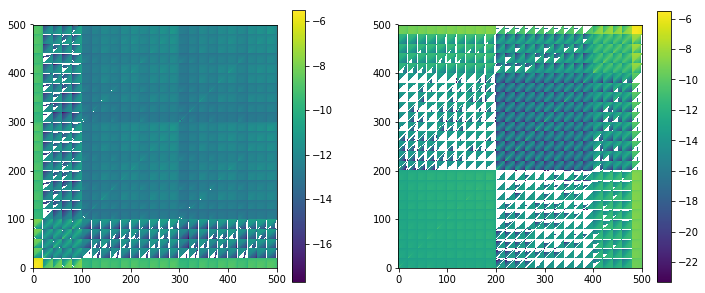

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(np.log10(TXPipe.covariance.covmat), origin='lower left')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.log10(Cosmosis['covmat'].data), origin='lower left')
plt.colorbar()


In [5]:
print(Cosmosis['covmat'].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  500                                                  NAXIS2  =                  500                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               COVDATA =                    T                                                  EXTNAME = 'COVMAT  '                                                            STRT_0  =                    0                                                  NAME_0  = 'xip     '                                                            STRT_1  =                  200                                                  NAME_1  = 'xim     '                    

In [6]:
cov_txpipe = TXPipe.covariance.covmat
cov_cosmosis = Cosmosis['covmat'].data

In [7]:
theta_txpipe, xi  = TXPipe.get_theta_xi('galaxy_density_xi', 'lens_0', 'lens_0')
theta_cosmosis = Cosmosis['wtheta'].data['ang']

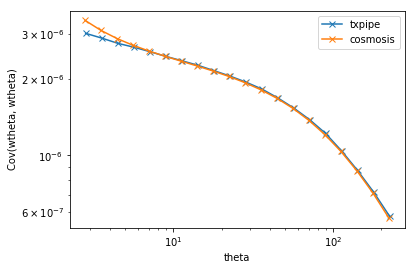

In [8]:
plt.loglog(theta_txpipe, np.diag(cov_txpipe[:20,:20]), marker='x', label='txpipe')
plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[480:,480:]), marker='x', label='cosmosis')
plt.xlabel('theta')
plt.ylabel('Cov(wtheta, wtheta)')
plt.legend()

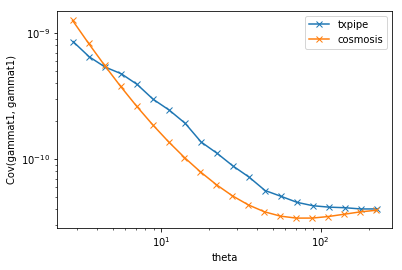

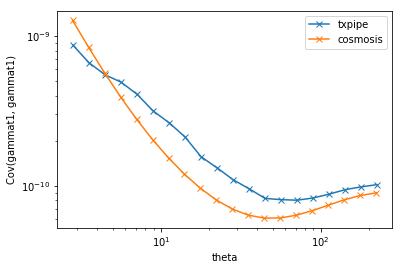

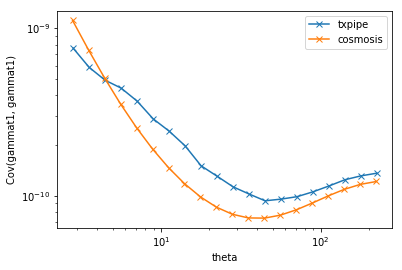

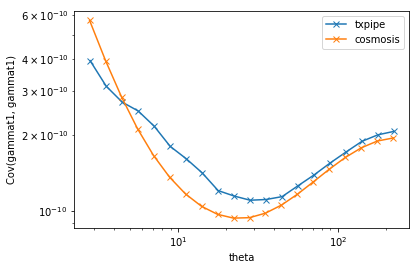

In [11]:
for i in range(4):
    plt.figure()
    plt.loglog(theta_txpipe, np.diag(cov_txpipe[20+i*20:40+i*20,20+i*20:40+i*20]), marker='x', label='txpipe')
    plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[400+i*20:420+i*20,400+i*20:420+i*20]), marker='x', label='cosmosis')
    plt.xlabel('theta')
    plt.ylabel('Cov(gammat1, gammat1)')
    plt.legend()

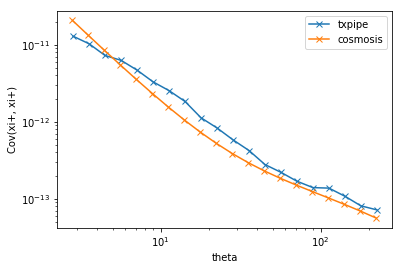

In [9]:
for i in range(4):
    for j  in range(4):
        plt.loglog(theta_txpipe, np.diag(cov_txpipe[100:120,100:120]), marker='x', label='txpipe')
        plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[:20,:20]), marker='x', label='cosmosis')
        plt.xlabel('theta')
        plt.ylabel('Cov(xi+, xi+)')
        plt.legend()

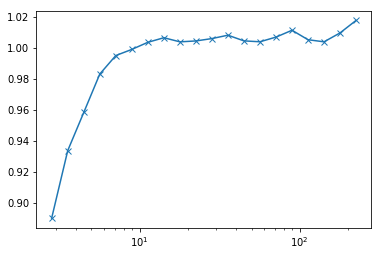

In [10]:
plt.semilogx(theta_txpipe, np.diag(cov_txpipe[:20,:20])/np.diag(cov_cosmosis[480:,480:]), marker='x', label='txpipe')

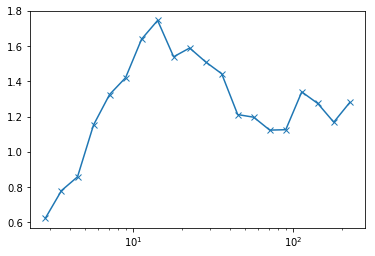

In [11]:
plt.semilogx(theta_txpipe, np.diag(cov_txpipe[100:120,100:120])/np.diag(cov_cosmosis[:20,:20]), marker='x', label='txpipe')
# plt.ylim(0,5)

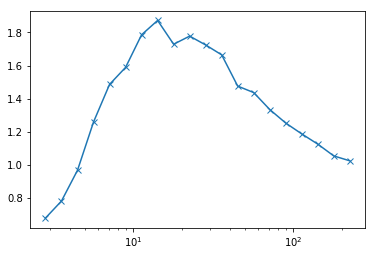

In [12]:
plt.semilogx(theta_txpipe, np.diag(cov_txpipe[20:40,20:40])/np.diag(cov_cosmosis[400:420,400:420]), marker='x', label='txpipe')
# plt.ylim(0,5)